<a href="https://colab.research.google.com/github/Binoy-John/Data-Structures/blob/master/Mushroom_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binoy John Mushroom Project

In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV

In [2]:
df=pd.read_csv("/content/mushrooms.csv")

## Viewing Head

In [3]:
df.head

<bound method NDFrame.head of      class cap-shape cap-surface  ... spore-print-color population habitat
0        p         x           s  ...                 k          s       u
1        e         x           s  ...                 n          n       g
2        e         b           s  ...                 n          n       m
3        p         x           y  ...                 k          s       u
4        e         x           s  ...                 n          a       g
...    ...       ...         ...  ...               ...        ...     ...
8119     e         k           s  ...                 b          c       l
8120     e         x           s  ...                 b          v       l
8121     e         f           s  ...                 b          c       l
8122     p         k           y  ...                 w          v       l
8123     e         x           s  ...                 o          c       l

[8124 rows x 23 columns]>

## Viewing Shape

In [6]:
df.shape

(8124, 23)

## Counting No. of Null values

In [9]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


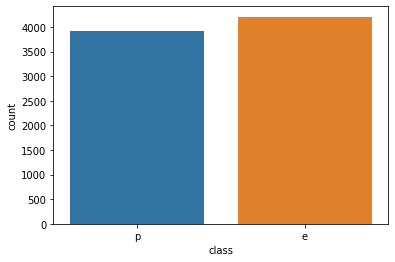

In [18]:
sns.countplot(df['class'])

<Figure size 1008x432 with 0 Axes>

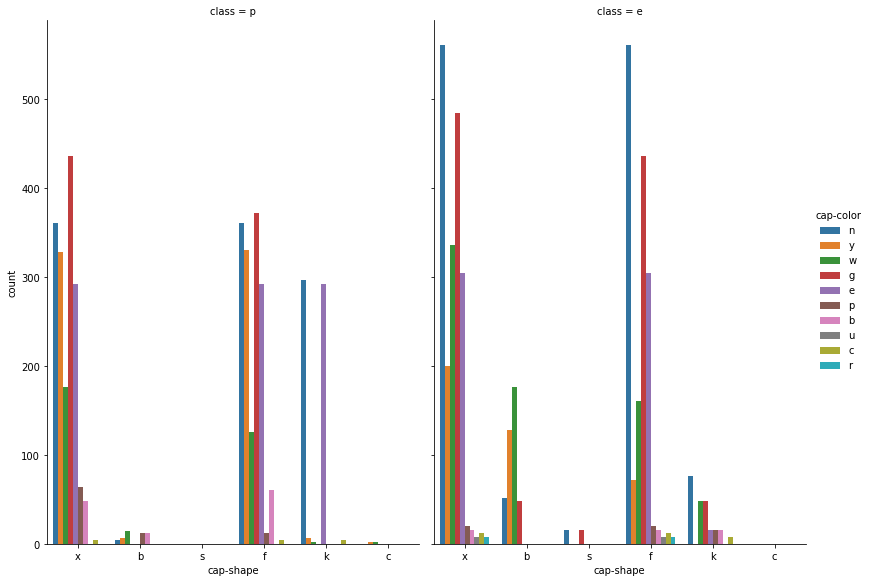

In [20]:
plt.figure(figsize=(14,6))
g = sns.catplot(x="cap-shape",hue="cap-color",col="class",data=df,kind="count",height=8,aspect=0.7)

## 1) White, bell shaped mushrooms are generally edible
##2) Red, knob shaped mushrooms are generally poisonous



<Figure size 1008x432 with 0 Axes>

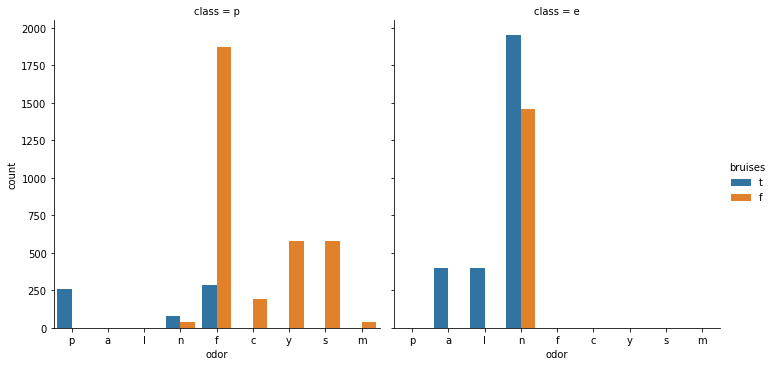

In [22]:
plt.figure(figsize=(14,6))
g=sns.catplot(x="odor",hue="bruises",col="class",data=df,kind="count")

### Non odored bruised are gerally edible
### foul odor non-bruised are generally poinonous 

# Data Preprocessing

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df.head

<bound method NDFrame.head of       class  cap-shape  cap-surface  ...  spore-print-color  population  habitat
0         1          5            2  ...                  2           3        5
1         0          5            2  ...                  3           2        1
2         0          0            2  ...                  3           2        3
3         1          5            3  ...                  2           3        5
4         0          5            2  ...                  3           0        1
...     ...        ...          ...  ...                ...         ...      ...
8119      0          3            2  ...                  0           1        2
8120      0          5            2  ...                  0           4        2
8121      0          2            2  ...                  0           1        2
8122      1          3            3  ...                  7           4        2
8123      0          5            2  ...                  4           1        

In [31]:
x = df.drop(['class'],axis=1)
y = df['class']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [35]:
dt.score(x_train,y_train)

0.9778403095321843

In [38]:
predictions = dt.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9827727645611156

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5)

In [42]:
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.992085824832923

In [43]:
predictions = rf.predict(x_test)
rf.score(x_test,y_test)

0.9922067268252666

In [44]:
accuracy_score(y_test,predictions)

0.9922067268252666



1.   Decision Tree Accuracy = 98.2%
2.   Random Forest Classifier = 99.2%

